Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

Searching for best practices, plotting keyword and publication trend

In [5]:
best_practice = wosis.keyword_matches(RC, ['best practice', 'good practice', 'best practise', 'good practise', 'an introduction to', 'a framework for', 'guidelines for'], threshold=95.0)

In [6]:
all_bp = best_practice.combine_recs()

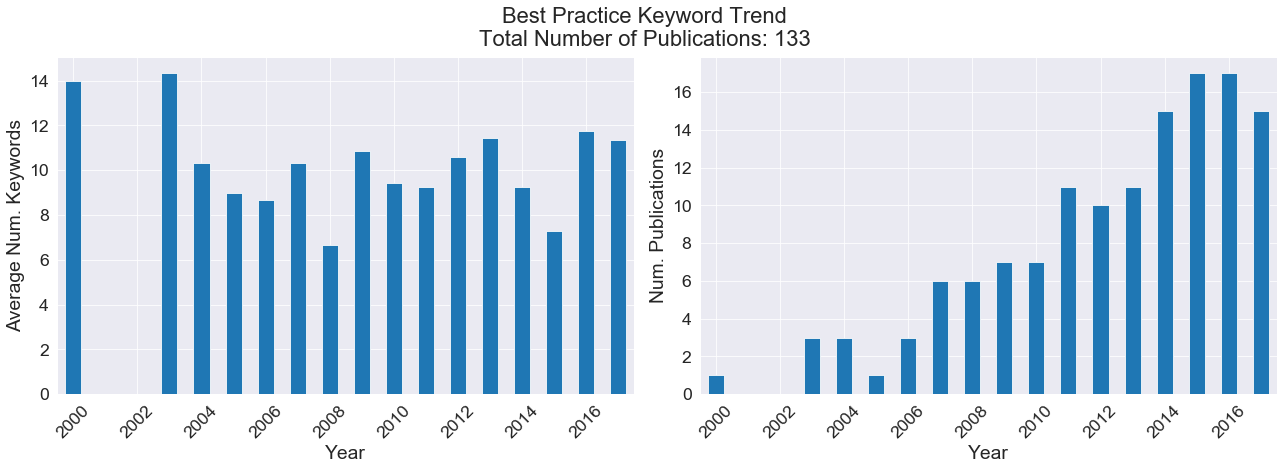

In [7]:
wos_plot.plot_kw_trend(all_bp, title='Best Practice Keyword Trend', save_plot_fn='figs/bp_kw_trend.png')

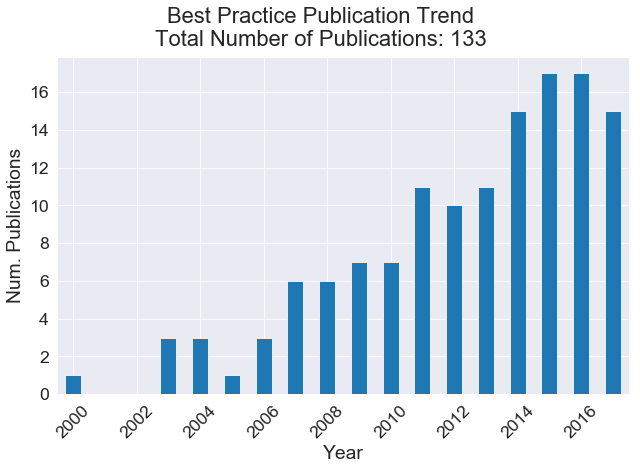

In [8]:
wos_plot.plot_pub_trend(all_bp, title='Best Practice Publication Trend', save_plot_fn='figs/bp_pub_trend.png')

<hr> Running a key-phrase extraction on best practices to identify the fields using this method.

In [9]:
bp_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_bp))

In [10]:
bp_phrases.display_phrases()

Review of the application of fuzzy inference systems in river flow forecasting (2009) 
https://dx.doi.org/10.2166/hydro.2009.038 

This paper provides a general overview about the use of fuzzy inference systems in the important field of river flow forecasting. 

A literature review of existing studies dealing with the use of fuzzy inference systems in river flow forecasting models is presented, followed by some recommendations for future research areas. 


Assessing sources of parametric uncertainty and uncertainty propagation in sediment runoff simulations of flooding (2010) 
https://dx.doi.org/10.1111/j.1753-318X.2010.01077.x 

The proposed uncertainty assessment is comprised in the three procedures. 

This paper presents a framework for assessing the contribution of different sources of parametric uncertainty in sediment runoff simulations. 

The proposed framework can provide useful information for improving sediment runoff modelling and its application to river basin management re

Watershed models have been widely used for creating the scientific basis for management decisions regarding nonpoint source pollution. 

We conclude by advocating a number of new directions for distributed watershed modeling, including in-depth uncertainty analysis and the use of additional information, not necessarily related to model end points, to constrain parameter estimation. 

Most "best practices" (optimization, validation, sensitivity, and uncertainty analysis) are not consistently employed during model development. 

There are no statistically significant differences in model performance uses. 

Studies which used more than one point in space to evaluate their distributed models had significantly lower median values of the Nash-Sutcliffe Efficiency (. 


Simulation of a Multilayer Leaky Aquifer with Stream Depletion (2013) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0000634 

Formulas are also obtained for the scenario in which the phreatic aquifer is hydraulically connect

A pore-scale modelling of flow through porous media samples, by simulating the incompressible Navier-Stokes equation in the pore spaces by employing the Lattice Boltzmann method has been taken up in the present study. 

The proposed integrated MCS-KL approach has been utilized successfully in the present work to propagate their effect on the pore-scale velocity field. 

The modelling of the input randomness also has an element of novelty in the present work as it directly captures the random solid-pore arrangement of the media geometry instead of any macro properties. 

Simulating the pore-scale flow-field past porous media samples is a computationally expensive exercise. 

The resulting, process is weakly correlated and needs a very large number of input random variables to capture its higher frequency content. 


Multi-objective model auto-calibration and reduced parameterization: Exploiting gradient-based optimization tool for a hydrologic model (2015) 
https://dx.doi.org/10.1016/j.

We assert that microscale information drawn from molecular models of the fabrication of the body provides a valuable source of prior information on parameters as well as a means for estimating model bias and designing virtual validation experiments to provide information gain over calibration posteriors. 

One example is given by models of elastomeric solids fabricated using polymerization processes. 


r.massmov: an open-source landslide model for dynamic early warning systems (2014) 
https://dx.doi.org/10.1007/s11069-013-0867-8 

Moreover, the results of multi-spatial resolution analysis conducted on a real case study located in the southern Switzerland are presented. 

Finally, the research workflow presented in this paper illustrates a best practice in applying r.massmov in real case applications. 

In particular, this analysis, composed by a sensitivity analysis and calibration process, allowed to evaluate the model capabilities in simulating the phenomenon at different input data

In this study: guidelines for parameterization and validation of APEX were developed based on literature review findings and the authors' experience; and a case study was provided to illustrate how the developed guidelines are applied. 

Simulated monthly and annual water yield values were within % and % of observed values during the calibration and validation periods, respectively. 


An ecological risk assessment for managing and predicting trophic shifts in estuarine ecosystems using a Bayesian network (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.08.014 

Estuaries are dynamic systems at the transition between freshwater and marine ecosystems. 

The BN provides an environmental risk assessment (ERA) for the probability of a shift to a eutrophied state based on markers of pelagic and benthic primary production. 

The BN was investigated for its potential to predict trophic shifts and provide a framework for evidence-based decision making. 


Microbial quality of reclaimed water 

The results showed that emissions of CFC- peaked at  tons ODP (Ozone Depletion Potential) in  and then gradually diminished, whereas HFC-a presented an increasing emission trend since s and the emissions of HFC-a reached , tons CO-equivelant (CO-eq) by the end of . 


Why Should Practitioners be Concerned about Predictive Uncertainty of Groundwater Management Models? (2017) 
https://dx.doi.org/10.1007/s11269-016-1508-2 

The purpose of this study is to convince water practitioners and water managers that uncertainty analysis is not just a smart, optional add-on to a groundwater model, but rather a critical and necessary step. 

After this illustration, we argue that calibration algorithms should become a routine process to bring the uncertainty analysis to the forefront. 

Despite significant advances in inverse modeling and uncertainty analysis, most of groundwater management models are still calibrated by manual trial and error and disregard predictive uncertainty. 

We promote the u

To significantly increase the contribution of numerical computational fluid dynamics (CFD) simulation for risk assessment and decision making, it is important to quantitatively measure the impact of uncertainties to assess the reliability and robustness of the results. 

A comparison of the three methods is given for each application. 


Estimation of measurement errors in orthotropic elastic moduli determined from natural frequencies (2017) 
https://dx.doi.org/10.1007/s00158-016-1552-9 

The approximation is then used to estimate the variability of the identified elastic moduli due to the measurement errors. 

This paper proposes an efficient method to estimate the errors in the elastic moduli caused by the measurement errors in the natural frequencies. 

It is shown that the aspect ratio of the test specimen greatly affects the standard deviation of the identified elastic moduli. 

However, due to measurement errors contained in the measured natural frequencies and mode shapes, the p

Next, the most sensitive parameters were then optimized for net sternum-to-spine compression depth, using a two-variable non-linear least squares method. 

Clinically, this suggests that current ERC guidelines for the CC rate during peak displacement CPR are appropriate; however, practitioners should be aware that the stiffness of the back support surfaces found in many hospitals may be sub-optimal and should consider using a backboard or a concrete floor to enhance CPR effectiveness. 


Assessing the impacts of climatic change on mountain water resources (2014) 
https://dx.doi.org/10.1016/j.scitotenv.2013.11.122 

These changes could in turn threaten the availability of water resources for many environmental and economic systems, and exacerbate a range of natural hazards that would compound these impacts. 

As the evidence for human induced climate change becomes clearer, so too does the realization that its effects will have impacts on numerous environmental and socio-economic system

Spatial misregistration resulted in a high degree of uncertainty in the detection of changes at the edges of coral patches mainly because of the low (similar to m) spatial resolution of Landsat TM, indicating that detection of coral reef bleaching by Landsat TM is limited to extremely severe cases on a large homogeneous coral patch and shallow water depths. 

The radiative transfer simulation indicates that the blue and green bands of Landsat TM can detect bleaching if at least % of the coral surface in a pixel has been bleached, assuming a Landsat TM pixel with a resolution of  x  in on shallow (less than  in deep) reef flats at Ishigaki Island, Japan. 

The difference in reflectance of shallow sand and corals is compared by examining multitemporal Landsat TM images at Ishigaki Island, after normalizing for variations in atmospheric conditions, incident light, water depth, and the sensor's reaction to the radiance received. 


Comparative flood damage model assessment: towards a Europ


An expert system for integrating biodiversity into agricultural life-cycle assessment (2014) 
https://dx.doi.org/10.1016/j.ecolind.2014.06.030 

A scoring system estimating the suitability of the farmland crops and SNHs as habitats as well as the reaction of each indicator-species group to the management options was developed. 

A case study calculated biodiversity scores for grassland along an intensity gradient, as well as those for winter wheat in the case of various cropping systems. 

The method developed is valid for grasslands, arable crops and semi-natural habitats (SNHs) of the farming landscape, and allows us to estimate the impact of management systems on biodiversity. 

The results allowed us to identify management options expected to have a major impact on biodiversity. 

Inventory data on crops, SNHs and agricultural practices with detailed management options were specified. 


Predicting driver's lane-changing decisions using a neural network model (2014) 
https://dx.do

We adapted existing validation methodologies and uncertainty analyses to account for multi-specific, multi-annual and diverse outputs, focusing on missing input data, incomplete and imprecise weed time series. 

It overestimated plant biomass and underestimated total flora density. 

Here, we evaluated the FLORSYS model which quantifies the effects of cropping systems and pedoclimate on multispecific weed dynamics with a daily time step. 

Weed dynamics models are needed to test prospective cropping systems but are rarely evaluated with independent data ("validated"). 


Assessing hydrologic prediction uncertainty resulting from soft land cover classification (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.05.049 

The results show that the predictions of evapotranspiration, runoff and baseflow are hardly affected by the classification uncertainty when area-averaged predictions are intended, implying that uncertainty propagation is only advisable in case a spatial distribution of the

The spatial distribution of habitat suitability is modelled at the landscape scale for multiple exotic plant species under current climate and a climate change scenario for the year . 


Enhancing adaptive sparse grid approximations and improving refinement strategies using adjoint-based a posteriori error estimates (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.09.014 

We use adjoint-based a posteriori error estimates of the physical discretization error and the interpolation error in the sparse grid to enhance the sparse grid approximation and to drive adaptivity of the sparse grid. 

In this paper we present an algorithm for adaptive sparse grid approximations of quantities of interest computed from discretized partial differential equations. 

Throughout this paper we also provide and test a framework for balancing the physical discretization error with the stochastic interpolation error of the enhanced sparse grid approximation. 


Modelling guidelines - terminology and guiding pr

This study addresses some issues that have not been given much attention in the literature, namely: () using the so-called CMC (Coupled Markov Chain) model for modeling heterogeneity as a non-Gaussian field characterized by multi-dimensional transition probabilities rather than variograms or autocorrelation functions, () considering a hydrodynamic flow field that is non-uniform in the mean flow due to boundary conditions where flow is driven from the left top corner moving to the right domain boundary, and () utilizing the concept of forward modeling in the framework of conditioning on geological borehole information (geometrical configuration), rather than conditioning on direct measurements of the hydrogeological parameters (e.g. 

The data at the site is merely used to calculate the transition probabilities used in the CMC model to generate a reference geological model for the rest of the analysis. 

The results show the potential applicability of the CMC model in reducing the uncer

A sensitivity analysis was then conducted to investigate the responses of carbon density and equilibrium time to  key parameters of the model. 

However, the mechanism through which the carbon cycle reaches the equilibrium state remains unclear. 

This study elucidates influencing factors and underlying control mechanisms in the carbon accumulation, and provides a framework for quantitative analysis of each component of the carbon cycle. 


Exploring temporal and functional synchronization in integrating models: A sensitivity analysis (2016) 
https://dx.doi.org/10.1016/j.cageo.2015.09.006 

Even if this time stepping is handled outside of the components (as assumed by good practice of component building) the use of inappropriate temporal synchronization can produce either major run-time redundancy or loss of model accuracy. 

When integrating independently built models, we may encounter components that describe the same processes or groups of processes using different assumptions and f

Stochastic hydro-economic modeling for optimal management of agricultural groundwater nitrate pollution under hydraulic conductivity uncertainty (2011) 
https://dx.doi.org/10.1016/j.envsoft.2011.02.010 

The main goal is to analyze the influence of uncertainty in the physical parameters of a heterogeneous groundwater diffuse pollution problem on the results of management strategies, and to introduce methods that integrate uncertainty and reliability in order to obtain strategies of spatial allocation of fertilizer use in agriculture. 

The approach allows deriving the trade-offs between the reliability of meeting the standard and the net benefits from agricultural production. 

A sensitivity analysis was carried out to assess the influence of the variance of the hydraulic conductivity fields on the strategies. 

By using a mixed-integer stochastic formulation, the desired reliability level of the strategy can be fixed in advance. 

In a risk-averse decision making, not only the reliabi

<hr> Top-cited journals for best practice

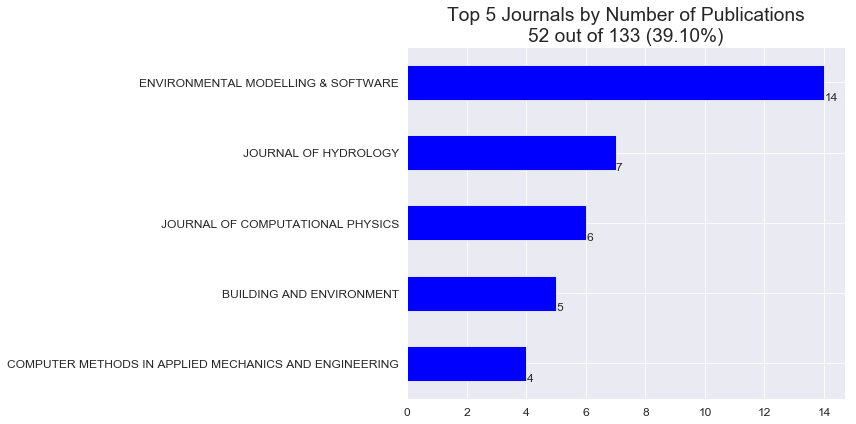

In [11]:
wos_plot.plot_pubs_per_journal(all_bp, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/bp_journal_pubs.png')

In [23]:
journals_of_interest_bp = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Journal of Computational Physics'.upper(), 'Building and Environment'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper()]
pubs_for_journals_bp = wosis.find_pubs_by_journal(all_bp, journals_of_interest_bp)

In [24]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_bp = {}
for pubs in pubs_for_journals_bp:
    paper_citations_per_journal_bp[pubs] = wosis.get_num_citations(pubs_for_journals_bp[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 7AJQQMddpTEnzg3iOq7)


FileNotFoundError: [Errno 2] No such file or directory: "tmp/{'best practice'} {'good practice'} {'best practise'} {'good practise'} {'an introduction to'} {'a framework for'} {'guidelines for'}_COMPUTER METHODS IN APPLIED MECHANICS AND ENGINEERING_citations.csv"

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_bp = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_bp.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_bp = collection_bp.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_bp = collection_bp.sort_values('citations', ascending=False)
top_cited_in_top_journals_bp.head(10)

In [ ]:
top_cited_in_top_journals_bp.to_csv('../data/top_cited_bp_papers.csv')

<hr> Topic trend

In [ ]:
wos_plot.plot_topic_trend([all_bp], save_plot_fn='figs/bp_topic_trend.png')

In [ ]:
wos_plot.plot_topic_trend([all_bp], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/bp_topic_trend_percentage.png')